# ROC AUC is terrible for imbalanced data
# Precision-Recall is much better

In [1]:
import os, sys
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (roc_curve, auc,
                             RocCurveDisplay,
                             PrecisionRecallDisplay)

In [5]:
!python --version

Python 3.9.12


In [3]:
# generate sample data
X, y = make_classification(n_samples=10000, 
                           weights=[0.99], 
                           flip_y=0)

# split into train/test subsets
(X_train, X_test, y_train, y_test) = train_test_split(
    X, y, test_size=.5, random_state=0)

# train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

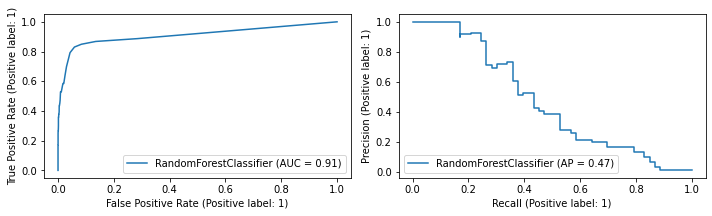

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
ax0, ax1 = ax.flatten()

RocCurveDisplay.from_estimator(
    model, X_test, y_test, ax=ax0)

PrecisionRecallDisplay.from_estimator(
    model, X_test, y_test, ax=ax1)

fig.tight_layout()
plt.show();